In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# keras import
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, GlobalMaxPooling1D
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.preprocessing import sequence, text
from keras.initializers import Constant
from keras.callbacks import EarlyStopping
import cloudpickle as cp
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import os
import sys

In [50]:
# Load the dataset

#### please change the file path as per your machine ####

mnist_file_path = '/content/gdrive/My Drive/Stevens/Spring 2019/ML/mnist.pkl'
# mnist_file_path = 'mnist.pkl'
    
with open(mnist_file_path, 'rb') as f:
    train_set, valid_set, test_set = cp.load(f, encoding = 'bytes')
f.close

<function BufferedReader.close>

In [51]:
X_train = train_set[0]
y_train = train_set[1]

channels = 1 #either black(0) or white(1)
img_dim_1 = 28
img_dim_2 = 28

X_train_reshaped = X_train.reshape(X_train.shape[0], img_dim_1, img_dim_2, channels)

y_train = OneHotEncoder().fit_transform(y_train.reshape(-1, 1))
# print(y_train.shape)


X_valid = valid_set[0]
y_valid = valid_set[1]

X_valid_reshaped = X_valid.reshape(X_valid.shape[0], img_dim_1, img_dim_2, channels)
y_valid = OneHotEncoder().fit_transform(y_valid.reshape(-1, 1))
# print(y_valid.shape)

X_test = test_set[0]
y_test = test_set[1]

X_test_reshaped = X_test.reshape(X_test.shape[0], img_dim_1, img_dim_2, channels)
y_test = OneHotEncoder().fit_transform(y_test.reshape(-1, 1))
# y_test.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [0]:
# parameters
INPUT_SHAPE = (img_dim_1, img_dim_2, channels)
FILTERS = 64 #number of filters/size of output layer/features maps
KERNEL_SIZE = (3,3) #filter window size
BATCH_SIZE = 32
n_classes = 10
es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
EPOCHS = 20

In [53]:
print('Training model.')

model = Sequential()

model.add(Conv2D(FILTERS, KERNEL_SIZE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(FILTERS, KERNEL_SIZE, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(FILTERS, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

Training model.


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['mae','accuracy'])

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                102464    
__________

In [56]:
test_mae = []
test_accu = []

val_loss = []
val_accu = []
val_mae = []

train_loss = []
train_accu = []
train_mae = []

for i in range(EPOCHS):
  
  history = model.fit(X_train_reshaped, y_train,
            batch_size=BATCH_SIZE,
            epochs=1,
            validation_data=(X_valid_reshaped, y_valid))
  
  train_loss.append(history.history['loss'])
  train_accu.append(history.history['acc'])
  train_mae.append(history.history['mean_absolute_error'])
  
  val_loss.append(history.history['val_loss'])
  val_accu.append(history.history['val_acc'])
  val_mae.append(history.history['val_mean_absolute_error'])
  
  eval_ = model.evaluate(X_test_reshaped, y_test, batch_size=BATCH_SIZE)
  
  test_mae.append(eval_[1])
  test_accu.append(eval_[2])
  
  #early stopping using validation set
  if val_loss[i] > val_loss[i-1]:
    print("Early stopping at %d epochs"%i)
    break
  
  

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 69us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 69us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 79us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 68us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 71us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 68us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 68us/step
Early stopping at 6 epochs


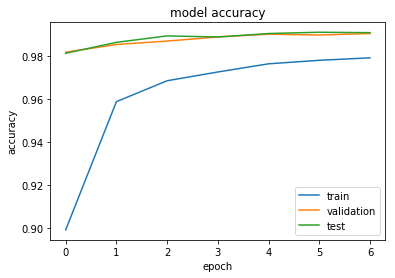

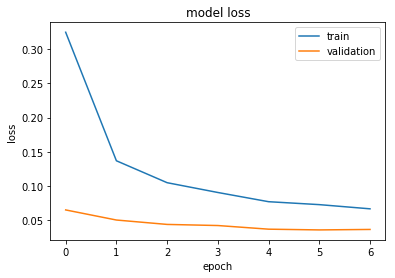

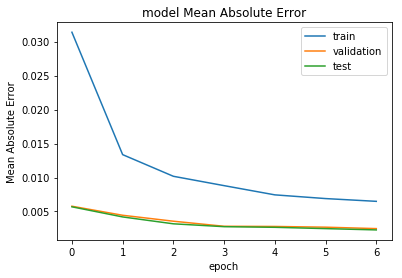

In [57]:
#Required plots

#  "Accuracy"
plt.plot(train_accu)
plt.plot(val_accu)
plt.plot(test_accu)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'test'])
plt.show()
# "Loss"
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()
#  "Mean Absolute Error"
plt.plot(train_mae)
plt.plot(val_mae)
plt.plot(test_mae)
plt.title('model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'test'])
plt.show()

In [58]:
print("Best validation accuracy:", max(val_accu)[0]*100,"%")
print("Best test accuracy:", max(test_accu)*100,"%")

Best validation accuracy: 99.05000000000001 %
Best test accuracy: 99.11 %


### Parameter choices

- I chose number of filters as 64, filter size as 3 by 3  and batch size=32.

- Here we have 10 different classes. So, I decided to go with less number of filters , which will decide the number of neurons for layer before output layer.

- I chose standard window size of 3x3, because we are not dealing with complex features which require bigger filters to grab finer details.

- 32 is the standard size for most of the DL models.


### Observations
- CNN with two convolutional layers and two dropout layers seems to work very well for given mnist dataset.
- Dropout helped in avoiding overfitting as well as it reduced learning step size of the model.
-  From plots, we can notice that CNN is learning most the features of dataset just after first epoch itself

### Effect of Pooling
- I believe, pooling makes model less sensitive to small changes in the input images. Pooling feature makes CNN more robust.
- Most the times we use Max pooling, which will only extract the features having maximum values.
- So, even if we rotate image or do other small changes in the image, CNN will still be able to learn its features regardless of rotation.